In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('./data/fingerpls.txt', sep=' ', header=None)
print(df.head())
X = df.iloc[:, 1:-1].values
X = X.astype(float)
y = df.iloc[:, -1].values
print(X.shape)
print(y.shape)


       0     1     2     3     4     5     6     7     8     9     ...  3022  \
0   47748_2     0     0     0     0     0     0     0     0     0  ...     0   
1   71274_4     0     0     0     0     0     0     0     0     0  ...     0   
2   99679_2     0     0     0     0     0     0     0     0     0  ...     0   
3  126628_1     0     0     0     0     0     0     0     0     0  ...     0   
4  127995_1     0     0     0     0     0     0     0     0     0  ...     0   

   3023  3024  3025  3026  3027  3028  3029  3030     3031  
0     0     0     0     0     0     0     0     0 -2.87789  
1     0     0     0     0     0     0     0     0 -4.41142  
2     0     0     0     0     0     0     0     0 -0.99876  
3     0     0     0     0     0     0     0     0 -3.92674  
4     0     0     0     0     0     0     0     0 -2.63751  

[5 rows x 3032 columns]
(207, 3030)
(207,)


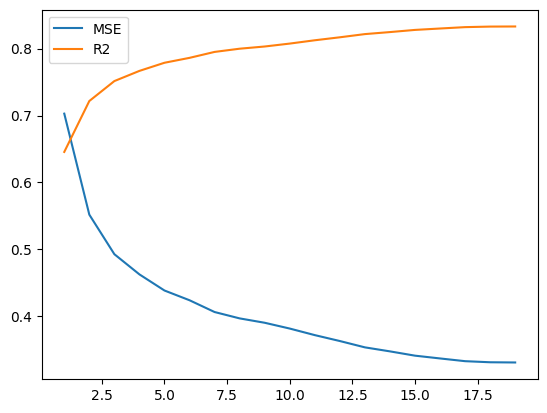

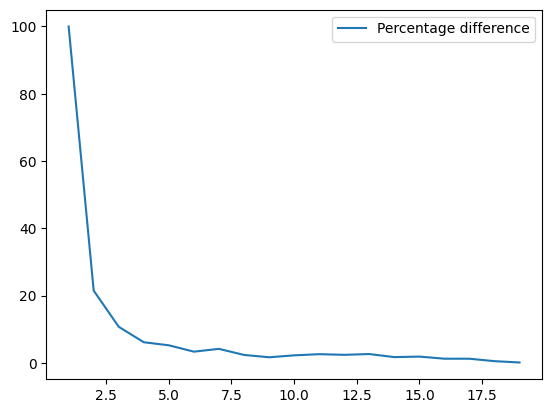

In [3]:
# splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, \
                                                random_state = 0)
mses = []
r2s = []
percdiff = []
for n in range(1, 20):
    pls = PLSRegression(n_components=n)
    y_pred = cross_val_predict(pls, X_train, y_train, cv=10)
    mse = mean_squared_error(y_train, y_pred)
    r2 = r2_score(y_train, y_pred)
    mses.append(mse)
    r2s.append(r2)

    if n > 1:
        percdiff.append((mses[-2] - mses[-1]) / mses[-2] * 100)
    else:
        percdiff.append(100)

plt.plot(range(1, 20), mses, label='MSE')
plt.plot(range(1, 20), r2s, label='R2')
plt.legend()
plt.show()

plt.plot(range(1, 20), percdiff, label='Percentage difference')
plt.legend()
plt.show()



In [4]:

# build a PLS model using 11 components
pls = PLSRegression(n_components=11)
pls.fit(X_train, y_train)
y_pred_test = pls.predict(X_test)
msetest = mean_squared_error(y_test, y_pred_test)
r2test = r2_score(y_test, y_pred_test)

y_pred_train = pls.predict(X_train)
msetrain = mean_squared_error(y_train, y_pred_train)
r2train = r2_score(y_train, y_pred_train)

MSE test: 0.3604904172089448
R2 test: 0.8382020928663911
MSE train: 0.014821067700162036
R2 train: 0.992527008294187


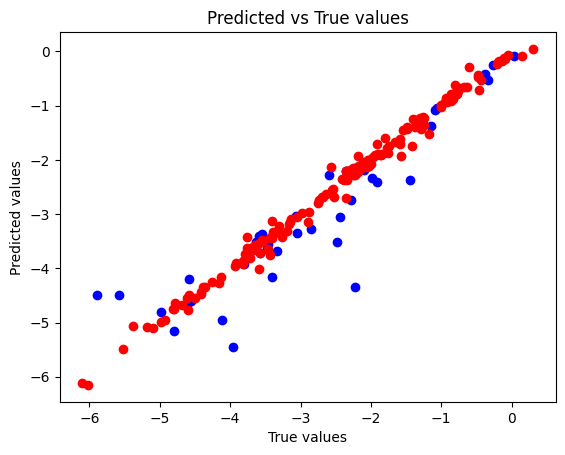

In [5]:
print('MSE test:', msetest)
print('R2 test:', r2test)
print('MSE train:', msetrain)
print('R2 train:', r2train)
plt.scatter(y_test, y_pred_test, color='blue')
plt.scatter(y_train, y_pred_train, color='red')
plt.title('Predicted vs True values')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.show()